In [ ]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

INFO:root:Loaded 20 rockstars for gv5, ff_benchmarkdiff.
100%|██████████| 6/6 [00:01<00:00,  3.75it/s]
INFO:root:run_parallel_experiments took 2.0940 seconds


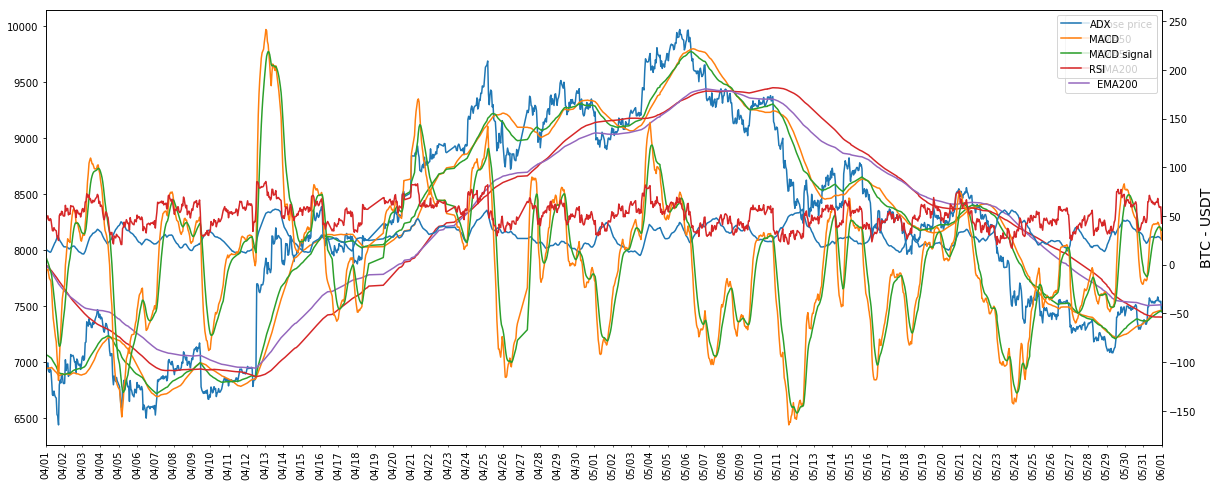

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

from genetic_program import FitnessFunction
from gp_artemis import ExperimentManager
from IPython.core.display import HTML, Javascript
from chart_plotter import DogeDNACanvas

CONDENSED_COLS = ['individual_str', 'transaction_currency', 'counter_currency', 'profit_percent', 'benchmark_profit_percent']

%matplotlib inline
pd.set_option('display.max_columns', 500)

# you can define custom fitness functions here and add them to the JSON below
class WowFitnessFunction(FitnessFunction):
    _name = "ff_sowow"

    def compute(self, individual, evaluation, genetic_program):
        return evaluation.profit_percent * evaluation.num_sells,

    
experiment_json = {
    "training_data": [
        {
        "transaction_currency": "BTC",
        "counter_currency": "USDT",
        "start_time": "2018/04/01 00:00:00 UTC",
        "end_time": "2018/06/01 00:00:00 UTC",
        "resample_period": 60,
        "source": 0
        },
        {
        "transaction_currency": "DOGE",
        "counter_currency": "BTC",
        "start_time": "2018/04/01 00:00:00 UTC",
        "end_time": "2018/06/01 00:00:00 UTC",
        "resample_period": 60,
        "source": 0
        },
        {
        "transaction_currency": "OMG",
        "counter_currency": "BTC",
        "start_time": "2018/06/01 00:00:00 UTC",
        "end_time": "2018/08/01 00:00:00 UTC",
        "resample_period": 60,
        "source": 0
        }
    ],

    "validation_data": [{
        "transaction_currency": "ETH",
        "counter_currency": "BTC",
        "start_time": "2018/06/01 00:00:00 UTC",
        "end_time": "2018/08/01 00:00:00 UTC",
        "resample_period": 60,
        "source": 0
    }],

    "fitness_functions": ["ff_benchmarkdiff", "ff_v1", "ff_benchmarkdiff_trades", "ff_benchlenctrl", "ff_benchlenctrl_v2", "ff_benchlenctrl_v3"],
    "grammar_version": "gv3",
    "num_generations": 10,

    "mating_probabilities": [
        0.9
    ],

    "mutation_probabilities": [
        0.5
    ],

    "population_sizes": [
        500 # range(200, 1000, 200)
    ]
}

#e = ExperimentManager(experiment_json, read_from_file=False)
e = ExperimentManager('gv5_experiments.json', read_from_file=True) 
e.run_parallel_experiments()
e.plot_data()


### Looking at performance per training dataset and across all experiment variants
For each training dataset in the training collection, we get a performance dataframe sorted by profit. The dataframes and best individuals in them are shown below.

Experiment id: run_evolution.d_BTC-USDT-1522540800-1527811200-ETH-USDT-1522540800-1527811200-LTC-BTC-1522540800-1527811200-ZEC-BTC-1522540800-1527811200-ETC-BTC-1522540800-1527811200;gv5;ff_benchmarkdiff;x_1.0;m_0.9;n_500;gen_100;td_5;a;nrs



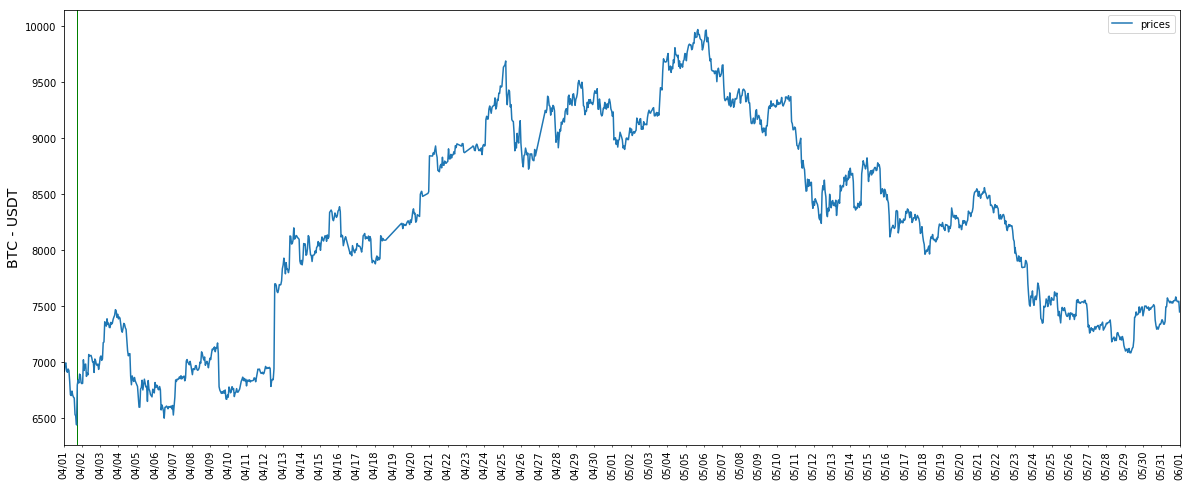

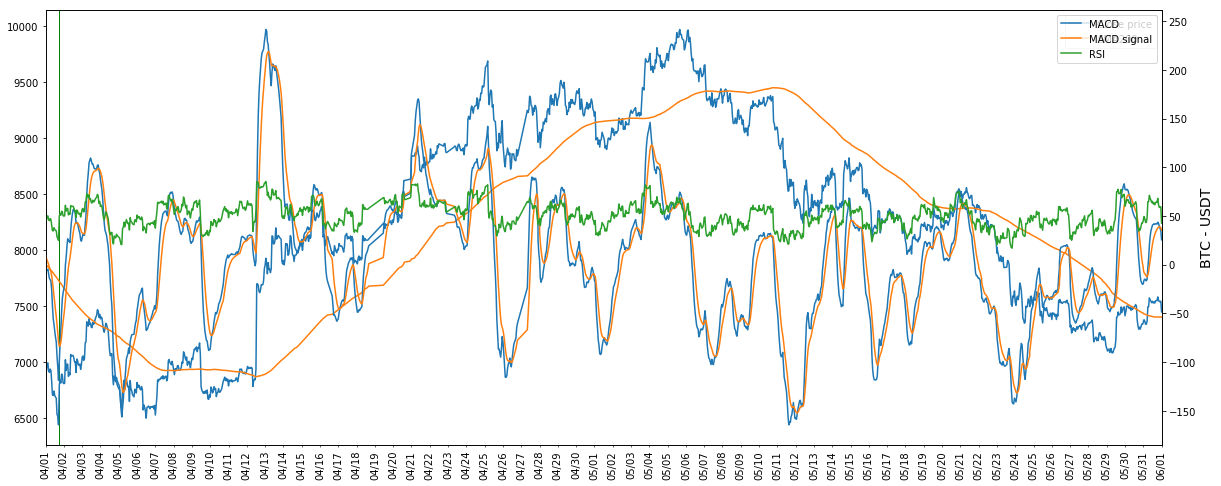

String representation:
if_then_else(bbands_price_gt_up(ARG0), if_then_else(lt(sma200(ARG0), 40.0), sell, buy), if_then_else(rsi_lt_25(ARG0), buy, if_then_else(slowd_lt_20(ARG0), if_then_else(macd_stoch_buy(ARG0), ignore, buy), ignore)))



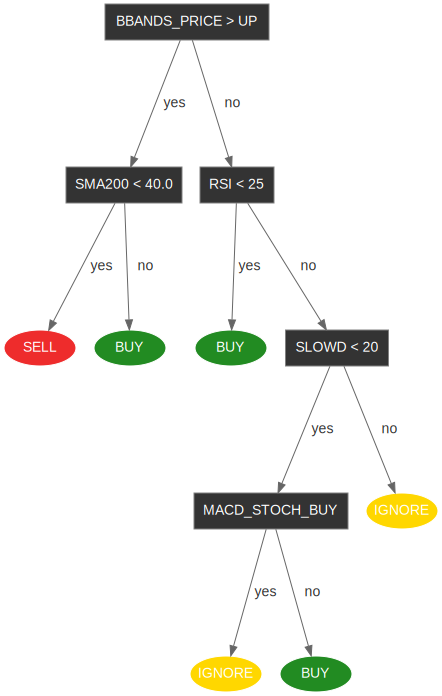

Backtesting report:
--

* Order execution log *

Start balance: cash = 1000 USDT, crypto = 0 
Start time: 2018-04-01 00:00:00
--
--
2018-04-01 17:00:00  	 OrderType.BUY    	 delta_cash ->      -1000.00 USDT 	 delta_currency ->      0.154844 BTC 	 (1 BTC = 6441.96103881 USDT ), slippage = 0.00
   signal: genetic_up strength=3 trend=1 horizon=None timestamp=2018-04-01 17:00:00 rsi_value=None
   cash: 0    crypto: 0.15484415288923645
End time: 2018-06-01 00:00:00

Summary
--
Number of trades: 1
End cash: 0.00 USDT
End crypto: 0.154844 BTC
End price: 7450.0
Total value invested: 1000 USDT
Total value after investment: 1150.70 USDT (+15.07%)
Profit: 150.70 USDT

Additional stats:
  Max drawdown: -0.2894338825029078
  Max drawdown duration: 2044800.0
  Sharpe ratio: 0.26454568278156165
  Alpha: 0.013068947390828773
  Beta: 0.9844910796129412
  Buy-sell pair gains - overall stats
     min = nan, max = nan, mean = nan, stdev = nan
  Buy-sell pair losses - overall stats
     min = nan, max = na

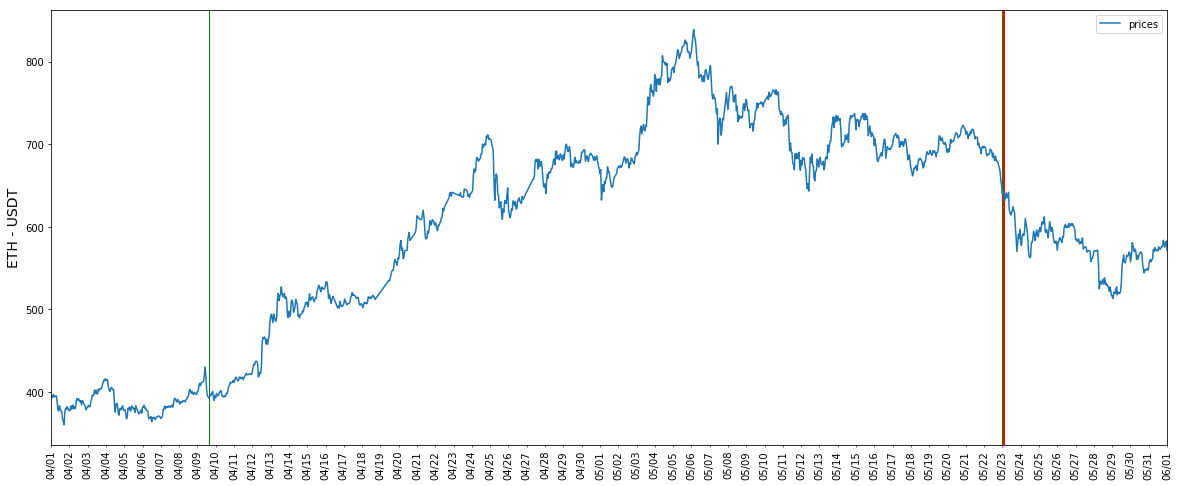

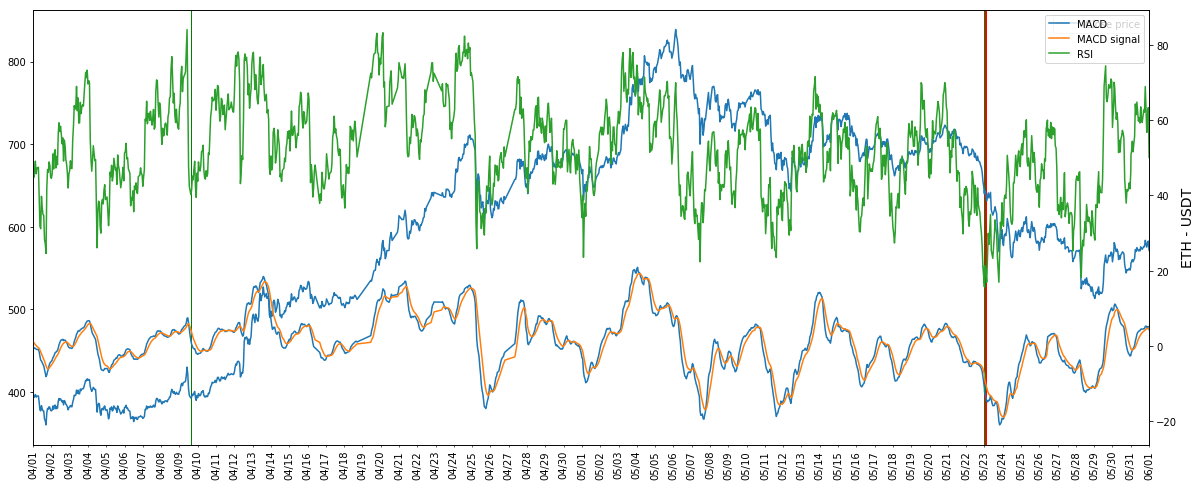

String representation:
if_then_else(rsi_lt_20(ARG0), if_then_else(xor(and_(slowd_lt_20(ARG0), bbands_squeeze_bearish(ARG0)), slowd_lt_20(ARG0)), if_then_else(macd_stoch_buy(ARG0), sell, buy), if_then_else(macd_stoch_buy(ARG0), sell, if_then_else(slowd_lt_20(ARG0), buy, sell))), if_then_else(slowd_lt_20(ARG0), if_then_else(macd_stoch_buy(ARG0), sell, buy), ignore))



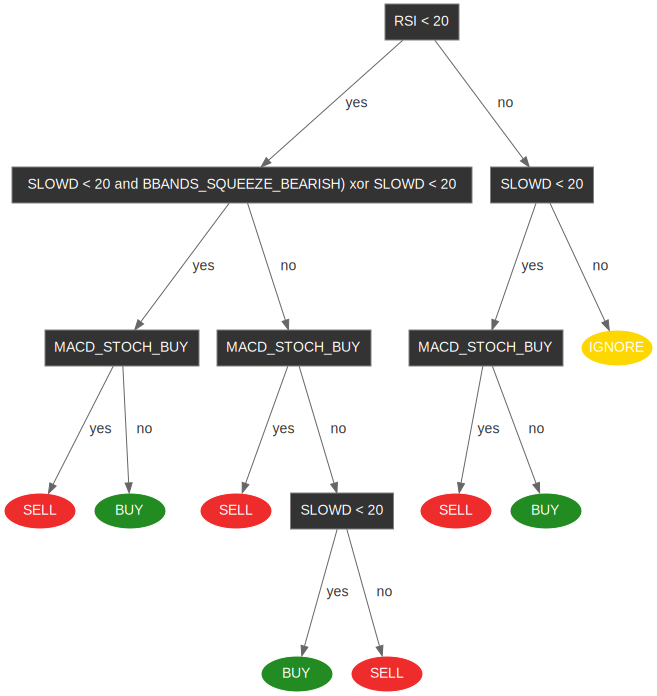

Backtesting report:
--

* Order execution log *

Start balance: cash = 1000 USDT, crypto = 0 
Start time: 2018-04-01 00:00:00
--
--
2018-04-09 15:00:00  	 OrderType.BUY    	 delta_cash ->      -1000.00 USDT 	 delta_currency ->      2.541337 ETH 	 (1 ETH = 392.51000012 USDT ), slippage = 0.00
   signal: genetic_up strength=3 trend=1 horizon=None timestamp=2018-04-09 15:00:00 rsi_value=None
   cash: 0.0    crypto: 2.5413365256809755
2018-05-22 23:00:00  	 OrderType.SELL   	 delta_cash ->       1645.20 USDT 	 delta_currency ->     -2.541337 ETH 	 (1 ETH = 649.00000000 USDT ), slippage = 0.00
   signal: genetic_down strength=3 trend=-1 horizon=None timestamp=2018-05-22 23:00:00 rsi_value=None
   cash: 1645.2040866540358    crypto: 0.0
2018-05-23 01:00:00  	 OrderType.BUY    	 delta_cash ->      -1645.20 USDT 	 delta_currency ->      2.552367 ETH 	 (1 ETH = 642.96823529 USDT ), slippage = 0.00
   signal: genetic_up strength=3 trend=1 horizon=None timestamp=2018-05-23 01:00:00 rsi_value=None

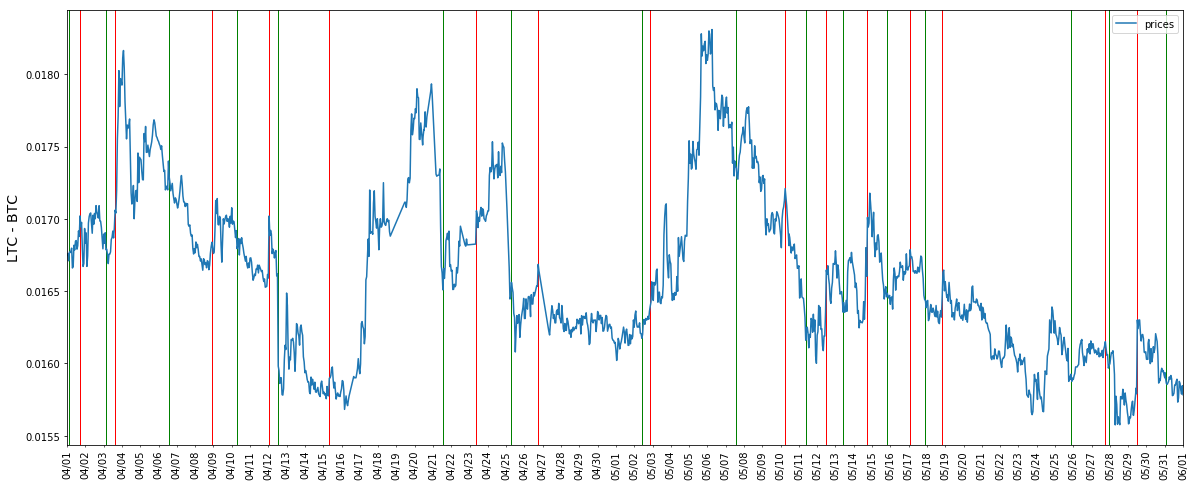

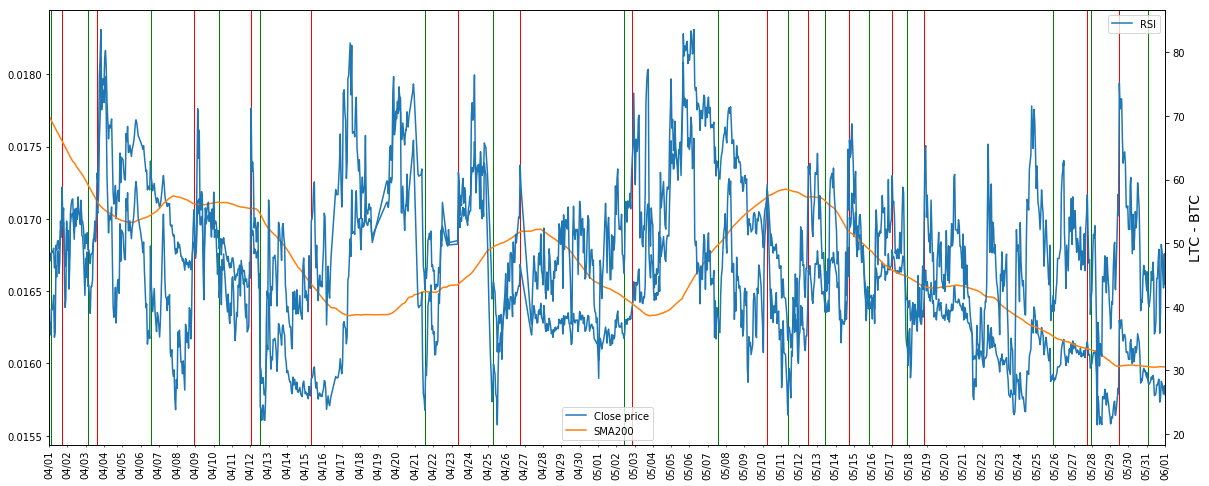

String representation:
if_then_else(bbands_price_gt_up(ARG0), if_then_else(lt(sma200(ARG0), 40.0), sell, buy), if_then_else(rsi_lt_25(ARG0), buy, if_then_else(ema_bearish_cross(ARG0), buy, ignore)))



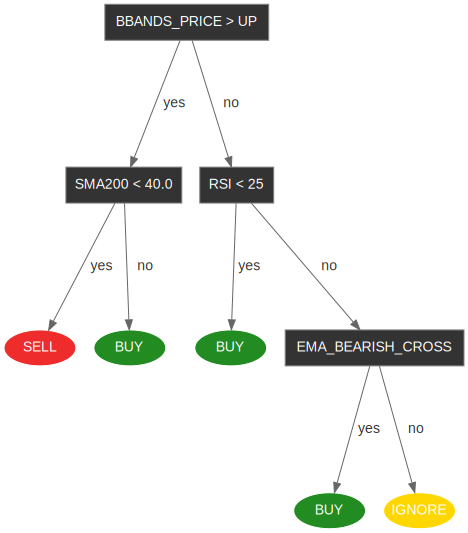

Backtesting report:
--

* Order execution log *

Start balance: cash = 1000 BTC, crypto = 0 
Start time: 2018-04-01 00:00:00
--
--
2018-04-01 02:00:00  	 OrderType.BUY    	 delta_cash ->      -1000.00 BTC 	 delta_currency ->  59695.508025 LTC 	 (1 LTC = 0.01670980 BTC ), slippage = 0.00
   signal: genetic_up strength=3 trend=1 horizon=None timestamp=2018-04-01 02:00:00 rsi_value=None
   cash: 0.0    crypto: 59695.5080252307
2018-04-01 17:00:00  	 OrderType.SELL   	 delta_cash ->       1013.48 BTC 	 delta_currency -> -59695.508025 LTC 	 (1 LTC = 0.01702002 BTC ), slippage = 0.00
   signal: genetic_down strength=3 trend=-1 horizon=None timestamp=2018-04-01 17:00:00 rsi_value=None
   cash: 1013.4786936483381    crypto: 0.0
2018-04-03 03:00:00  	 OrderType.BUY    	 delta_cash ->      -1013.48 BTC 	 delta_currency ->  60225.521218 LTC 	 (1 LTC = 0.01678599 BTC ), slippage = 0.00
   signal: genetic_up strength=3 trend=1 horizon=None timestamp=2018-04-03 03:00:00 rsi_value=None
   cash: 0.0  


Benchmark backtesting report:
 Buy&hold, start_time=1522540800.0, end_time=1527811200.0, transaction_currency=LTC, counter_currency=BTC, source=0
--

* Order execution log *

Start balance: cash = 1000 BTC, crypto = 0 
Start time: 2018-04-01 00:00:00
--
--
2018-04-01 00:00:00  	 OrderType.BUY    	 delta_cash ->      -1000.00 BTC 	 delta_currency ->  59521.998077 LTC 	 (1 LTC = 0.01675851 BTC ), slippage = 0.00
   cash: 0.0    crypto: 59521.9980773947
2018-06-01 00:00:00  	 OrderType.SELL   	 delta_cash ->        937.10 BTC 	 delta_currency -> -59521.998077 LTC 	 (1 LTC = 0.01578322 BTC ), slippage = 0.00
   cash: 937.10016851886    crypto: 0.0
End time: 2018-06-01 00:00:00

Summary
--
Number of trades: 2
End cash: 937.10 BTC
End crypto: 0.000000 LTC
End price: 0.01578241
Total value invested: 1000 BTC
Total value after investment: 937.10 BTC (-6.29%)
Profit: -62.90 BTC
Total value invested: 6920000.00 USDT (conversion on 2018-04-01 00:00:00)
Total value after investment: 7014194.76 US

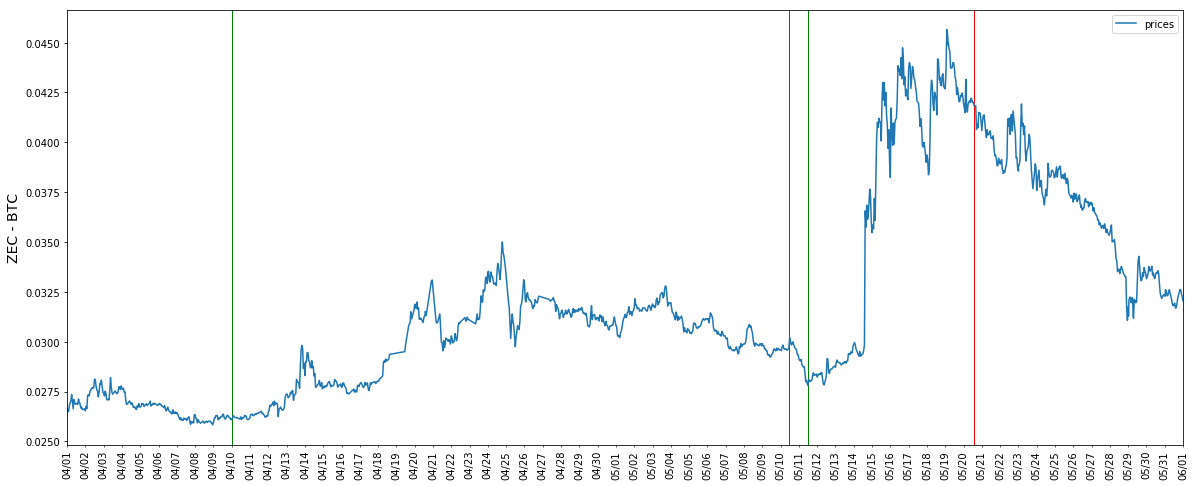

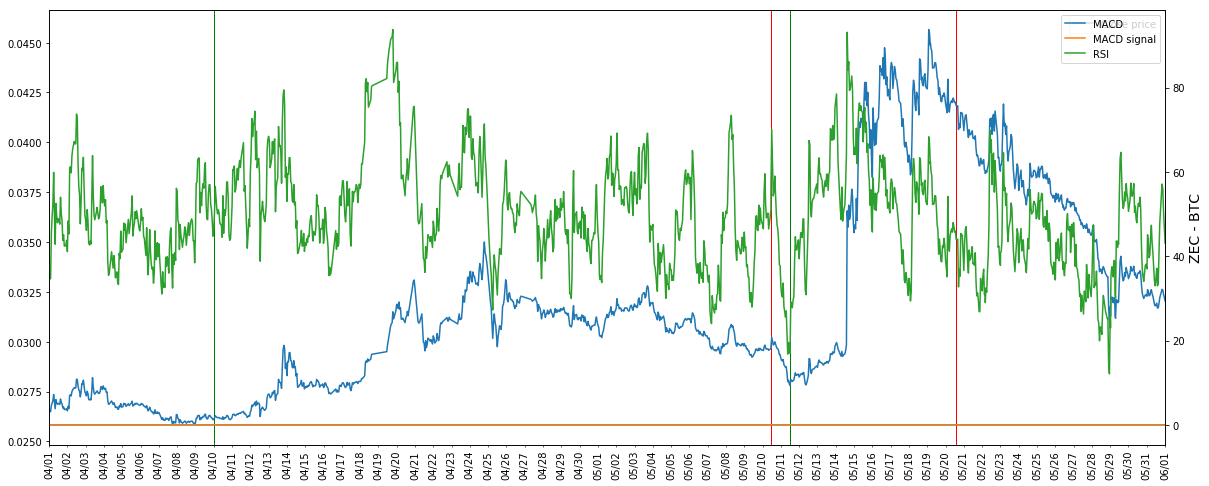

String representation:
if_then_else(rsi_lt_20(ARG0), if_then_else(slowd_lt_20(ARG0), buy, sell), if_then_else(slowd_lt_20(ARG0), if_then_else(xor(macd_stoch_buy(ARG0), True), ignore, sell), if_then_else(ema_bearish_cross(ARG0), buy, ignore)))



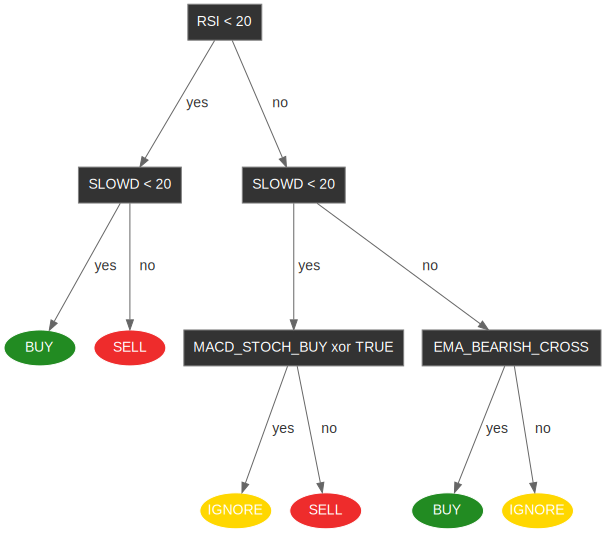

Backtesting report:
--

* Order execution log *

Start balance: cash = 1000 BTC, crypto = 0 
Start time: 2018-04-01 00:00:00
--
--
2018-04-10 00:00:00  	 OrderType.BUY    	 delta_cash ->      -1000.00 BTC 	 delta_currency ->  38203.753351 ZEC 	 (1 ZEC = 0.02611000 BTC ), slippage = 0.00
   signal: genetic_up strength=3 trend=1 horizon=None timestamp=2018-04-10 00:00:00 rsi_value=None
   cash: 0.0    crypto: 38203.75335120643
2018-05-10 11:02:00  	 OrderType.SELL   	 delta_cash ->       1134.67 BTC 	 delta_currency -> -38203.753351 ZEC 	 (1 ZEC = 0.02977500 BTC ), slippage = 0.00
   signal: genetic_down strength=3 trend=-1 horizon=None timestamp=2018-05-10 11:02:00 rsi_value=None
   cash: 1134.6729641420911    crypto: 0.0
2018-05-11 12:00:00  	 OrderType.BUY    	 delta_cash ->      -1134.67 BTC 	 delta_currency ->  40702.261666 ZEC 	 (1 ZEC = 0.02780770 BTC ), slippage = 0.00
   signal: genetic_up strength=3 trend=1 horizon=None timestamp=2018-05-11 12:00:00 rsi_value=None
   cash: 0.0 

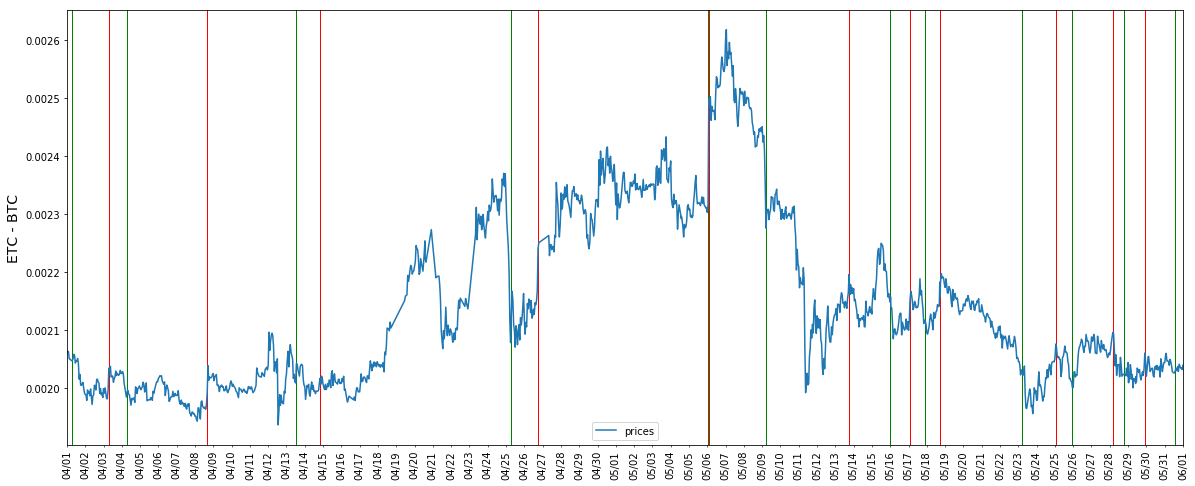

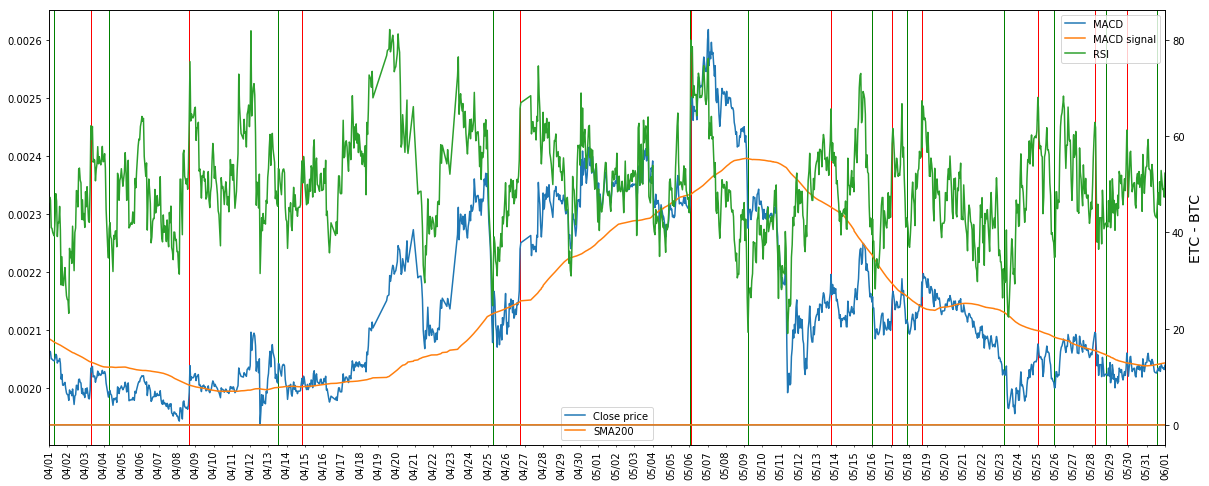

String representation:
if_then_else(bbands_price_gt_up(ARG0), if_then_else(lt(sma200(ARG0), 30.0), sell, buy), if_then_else(rsi_lt_25(ARG0), buy, if_then_else(slowd_lt_20(ARG0), if_then_else(macd_stoch_buy(ARG0), ignore, buy), ignore)))



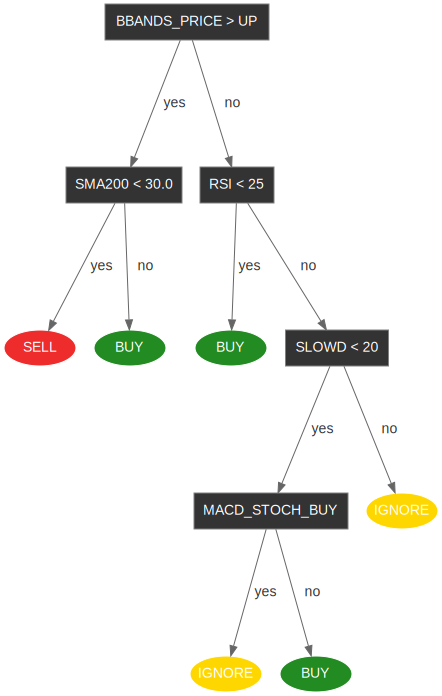

Backtesting report:
--

* Order execution log *

Start balance: cash = 1000 BTC, crypto = 0 
Start time: 2018-04-01 00:00:00
--
--
2018-04-01 07:00:00  	 OrderType.BUY    	 delta_cash ->      -1000.00 BTC 	 delta_currency -> 487419.923870 ETC 	 (1 ETC = 0.00204649 BTC ), slippage = 0.00
   signal: genetic_up strength=3 trend=1 horizon=None timestamp=2018-04-01 07:00:00 rsi_value=None
   cash: 0.0    crypto: 487419.92386964994
2018-04-03 07:00:00  	 OrderType.SELL   	 delta_cash ->        988.99 BTC 	 delta_currency -> -487419.923870 ETC 	 (1 ETC = 0.00203411 BTC ), slippage = 0.00
   signal: genetic_down strength=3 trend=-1 horizon=None timestamp=2018-04-03 07:00:00 rsi_value=None
   cash: 988.9870769891374    crypto: 0.0
2018-04-04 07:00:00  	 OrderType.BUY    	 delta_cash ->       -988.99 BTC 	 delta_currency -> 494890.443111 ETC 	 (1 ETC = 0.00199340 BTC ), slippage = 0.00
   signal: genetic_up strength=3 trend=1 horizon=None timestamp=2018-04-04 07:00:00 rsi_value=None
   cash: 0.0


Benchmark backtesting report:
 Buy&hold, start_time=1522540800.0, end_time=1527811200.0, transaction_currency=ETC, counter_currency=BTC, source=0
--

* Order execution log *

Start balance: cash = 1000 BTC, crypto = 0 
Start time: 2018-04-01 00:00:00
--
--
2018-04-01 00:00:00  	 OrderType.BUY    	 delta_cash ->      -1000.00 BTC 	 delta_currency -> 482739.930214 ETC 	 (1 ETC = 0.00206633 BTC ), slippage = 0.00
   cash: 0.0    crypto: 482739.9302144382
2018-06-01 00:00:00  	 OrderType.SELL   	 delta_cash ->        981.13 BTC 	 delta_currency -> -482739.930214 ETC 	 (1 ETC = 0.00203752 BTC ), slippage = 0.00
   cash: 981.133281953996    crypto: 0.0
End time: 2018-06-01 00:00:00

Summary
--
Number of trades: 2
End cash: 981.13 BTC
End crypto: 0.000000 ETC
End price: 0.002039
Total value invested: 1000 BTC
Total value after investment: 981.13 BTC (-1.89%)
Profit: -18.87 BTC
Total value invested: 6920000.00 USDT (conversion on 2018-04-01 00:00:00)
Total value after investment: 7343782.62 U

In [2]:
performance_dfs = e.get_joined_performance_dfs_over_all_variants()

We can explore each of the performance dataframes in more detail.

In [4]:
pd.set_option('display.max_colwidth', -1)
performance_dfs[0][CONDENSED_COLS]

,individual_str,transaction_currency,counter_currency,profit_percent,benchmark_profit_percent
9,"if_then_else(bbands_price_gt_up(ARG0), if_then_else(lt(sma200(ARG0), 40.0), sell, buy), if_then_else(rsi_lt_25(ARG0), buy, if_then_else(slowd_lt_20(ARG0), if_then_else(macd_stoch_buy(ARG0), ignore, buy), ignore)))",BTC,USDT,15.070497,7.624592
4,"if_then_else(macd_stoch_sell(ARG0), if_then_else(lt(sma200(ARG0), 30.0), if_then_else(macd_stoch_buy(ARG0), buy, sell), if_then_else(ema_bearish_cross(ARG0), buy, ignore)), if_then_else(rsi_lt_25(ARG0), buy, if_then_else(slowd_lt_20(ARG0), if_then_else(macd_stoch_buy(ARG0), sell, ignore), if_then_else(rsi_gt_80(ARG0), buy, ignore))))",BTC,USDT,15.070497,7.624592
0,"if_then_else(bbands_price_gt_up(ARG0), if_then_else(lt(sma200(ARG0), 40.0), if_then_else(and_(slowd_lt_20(ARG0), macd_bullish(ARG0)), buy, sell), if_then_else(slowd_lt_20(ARG0), buy, ignore)), if_then_else(rsi_lt_25(ARG0), buy, if_then_else(slowd_lt_20(ARG0), if_then_else(macd_stoch_buy(ARG0), sell, buy), ignore)))",BTC,USDT,15.070497,7.624592
1,"if_then_else(macd_stoch_sell(ARG0), if_then_else(lt(sma200(ARG0), 30.0), if_then_else(and_(bbands_price_lt_low(ARG0), macd_stoch_sell(ARG0)), buy, sell), if_then_else(ema_bearish_cross(ARG0), buy, ignore)), if_then_else(rsi_lt_25(ARG0), buy, if_then_else(slowd_lt_20(ARG0), if_then_else(macd_stoch_buy(ARG0), sell, ignore), if_then_else(rsi_gt_80(ARG0), buy, ignore))))",BTC,USDT,15.070497,7.624592
3,"if_then_else(macd_stoch_sell(ARG0), if_then_else(lt(sma200(ARG0), 40.0), if_then_else(and_(bbands_price_lt_low(ARG0), bbands_squeeze_bearish(ARG0)), buy, sell), if_then_else(ema_bearish_cross(ARG0), buy, ignore)), if_then_else(rsi_lt_25(ARG0), buy, if_then_else(slowd_lt_20(ARG0), if_then_else(macd_stoch_buy(ARG0), sell, ignore), if_then_else(rsi_gt_80(ARG0), buy, ignore))))",BTC,USDT,15.070497,7.624592
2,"if_then_else(macd_stoch_sell(ARG0), if_then_else(lt(sma200(ARG0), 40.0), if_then_else(and_(bbands_price_lt_low(ARG0), bbands_squeeze_bearish(ARG0)), buy, sell), if_then_else(ema_bearish_cross(ARG0), buy, ignore)), if_then_else(rsi_lt_25(ARG0), buy, if_then_else(slowd_lt_20(ARG0), if_then_else(macd_stoch_buy(ARG0), buy, ignore), if_then_else(rsi_gt_80(ARG0), buy, ignore))))",BTC,USDT,15.070497,7.624592
5,"if_then_else(bbands_price_gt_up(ARG0), if_then_else(lt(sma200(ARG0), 30.0), sell, buy), if_then_else(rsi_lt_25(ARG0), buy, if_then_else(slowd_lt_20(ARG0), if_then_else(macd_stoch_buy(ARG0), ignore, buy), ignore)))",BTC,USDT,15.070497,7.624592
6,"if_then_else(bbands_price_gt_up(ARG0), if_then_else(lt(sma200(ARG0), 40.0), if_then_else(and_(slowd_lt_20(ARG0), macd_bullish(ARG0)), buy, sell), if_then_else(slowd_lt_20(ARG0), buy, ignore)), if_then_else(rsi_lt_25(ARG0), buy, if_then_else(slowd_lt_20(ARG0), if_then_else(macd_stoch_buy(ARG0), ignore, buy), ignore)))",BTC,USDT,15.070497,7.624592
7,"if_then_else(macd_stoch_sell(ARG0), if_then_else(lt(sma200(ARG0), 30.0), if_then_else(and_(bbands_price_lt_low(ARG0), bbands_squeeze_bearish(ARG0)), buy, sell), if_then_else(ema_bearish_cross(ARG0), buy, ignore)), if_then_else(rsi_lt_25(ARG0), buy, if_then_else(slowd_lt_20(ARG0), if_then_else(macd_stoch_buy(ARG0), sell, ignore), if_then_else(rsi_gt_80(ARG0), buy, ignore))))",BTC,USDT,15.070497,7.624592
8,"if_then_else(bbands_price_gt_up(ARG0), if_then_else(lt(sma200(ARG0), 40.0), sell, buy), if_then_else(rsi_lt_25(ARG0), buy, if_then_else(ema_bearish_cross(ARG0), buy, ignore)))",BTC,USDT,15.070497,7.624592


Experiment id: run_evolution.d_BTC-USDT-1522540800-1527811200-ETH-USDT-1522540800-1527811200-LTC-BTC-1522540800-1527811200-ZEC-BTC-1522540800-1527811200-ETC-BTC-1522540800-1527811200;gv5;ff_benchmarkdiff;x_1.0;m_0.9;n_500;gen_100;td_5;a;nrs



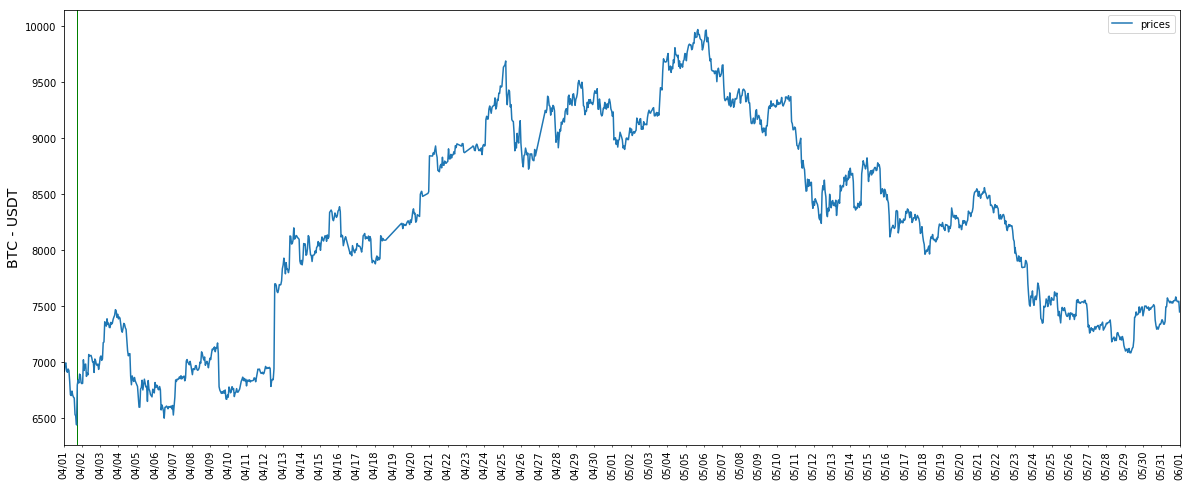

String representation:
if_then_else(bbands_price_gt_up(ARG0), if_then_else(lt(sma200(ARG0), 40.0), sell, buy), if_then_else(rsi_lt_25(ARG0), buy, if_then_else(slowd_lt_20(ARG0), if_then_else(macd_stoch_buy(ARG0), ignore, buy), ignore)))



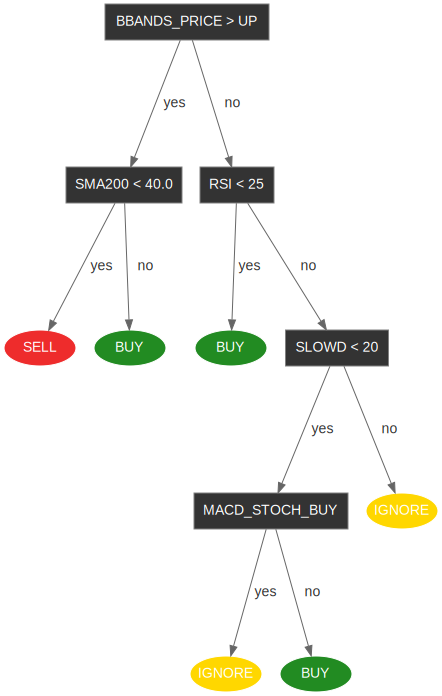

Backtesting report:
--

* Order execution log *

Start balance: cash = 1000 USDT, crypto = 0 
Start time: 2018-04-01 00:00:00
--
--
2018-04-01 17:00:00  	 OrderType.BUY    	 delta_cash ->      -1000.00 USDT 	 delta_currency ->      0.154844 BTC 	 (1 BTC = 6441.96103881 USDT ), slippage = 0.00
   signal: genetic_up strength=3 trend=1 horizon=None timestamp=2018-04-01 17:00:00 rsi_value=None
   cash: 0    crypto: 0.15484415288923645
End time: 2018-06-01 00:00:00

Summary
--
Number of trades: 1
End cash: 0.00 USDT
End crypto: 0.154844 BTC
End price: 7450.0
Total value invested: 1000 USDT
Total value after investment: 1150.70 USDT (+15.07%)
Profit: 150.70 USDT

Additional stats:
  Max drawdown: -0.2894338825029078
  Max drawdown duration: 2044800.0
  Sharpe ratio: 0.26454568278156165
  Alpha: 0.013068947390828773
  Beta: 0.9844910796129412
  Buy-sell pair gains - overall stats
     min = nan, max = nan, mean = nan, stdev = nan
  Buy-sell pair losses - overall stats
     min = nan, max = na

In [5]:
e.performance_df_row_info(performance_dfs[0].iloc[0])

### Best performing individuals across all variants and datasets
Each experiment variant will have a winner, the doge baby that had the best fitness value. We can get these winners by invoking the command below:

In [6]:
best_individuals_across_variants_and_datasets = e.get_best_performing_across_variants_and_datasets(e.training_data, sort_by=["fitness_value"])

In [7]:
pd.set_option('display.max_colwidth', -1)
best_individuals_across_variants_and_datasets.drop(['individual','variant','evaluations'], axis=1)




,experiment_name,doge,fitness_function,fitness_value,mean_profit,std_profit,max_profit,min_profit,all_profits,benchmark_profits,differences
5,run_evolution.d_BTC-USDT-1522540800-1527811200-ETH-USDT-1522540800-1527811200-LTC-BTC-1522540800-1527811200-ZEC-BTC-1522540800-1527811200-ETC-BTC-1522540800-1527811200;gv5;ff_benchmarkdiff;x_1.0;m_0.9;n_500;gen_100;td_5;a;nrs,"if_then_else(bbands_price_gt_up(ARG0), if_then_else(lt(sma200(ARG0), 40.0), if_then_else(and_(slowd_lt_20(ARG0), macd_bullish(ARG0)), buy, sell), if_then_else(slowd_lt_20(ARG0), buy, ignore)), if_then_else(rsi_lt_25(ARG0), buy, if_then_else(slowd_lt_20(ARG0), if_then_else(macd_stoch_buy(ARG0), sell, buy), ignore)))",ff_benchmarkdiff,7.445904,26.755718,18.954560,57.899610,5.974855,"15.070496667724957, 57.89961032881249, 5.974854651922169, 38.75638858937891, 16.07723745465237","7.624592214595373, 46.16225351887365, -6.289983148114003, 19.854557650843436, -1.8866718046004052","7.445904453129583, 11.737356809938845, 12.264837800036172, 18.901830938535472, 17.963909259252773"
2,run_evolution.d_BTC-USDT-1522540800-1527811200-ETH-USDT-1522540800-1527811200-LTC-BTC-1522540800-1527811200-ZEC-BTC-1522540800-1527811200-ETC-BTC-1522540800-1527811200;gv5;ff_benchmarkdiff;x_0.9;m_0.9;n_500;gen_100;td_5;a;nrs,"if_then_else(rsi_lt_20(ARG0), if_then_else(xor(and_(ema_bearish_cross(ARG0), bbands_squeeze_bearish(ARG0)), slowd_lt_20(ARG0)), buy, if_then_else(ema_bearish_cross(ARG0), buy, sell)), if_then_else(slowd_lt_20(ARG0), if_then_else(macd_stoch_buy(ARG0), sell, buy), ignore))",ff_benchmarkdiff,1.945539,22.320752,22.585422,62.578854,-4.344444,"14.798749671383051, 62.578854485006744, -4.344444445368242, 27.7632287562438, 10.807372571023302","7.624592214595373, 46.16225351887365, -6.289983148114003, 19.854557650843436, -1.8866718046004052","7.174157456787678, 16.416600966133096, 1.9455387027457611, 7.908671105400366, 12.694044375623708"
3,run_evolution.d_BTC-USDT-1522540800-1527811200-ETH-USDT-1522540800-1527811200-LTC-BTC-1522540800-1527811200-ZEC-BTC-1522540800-1527811200-ETC-BTC-1522540800-1527811200;gv5;ff_benchmarkdiff;x_1.0;m_0.5;n_500;gen_100;td_5;a;nrs,"if_then_else(rsi_lt_20(ARG0), if_then_else(xor(and_(slowd_lt_20(ARG0), bbands_squeeze_bearish(ARG0)), slowd_lt_20(ARG0)), if_then_else(macd_stoch_buy(ARG0), sell, buy), if_then_else(macd_stoch_buy(ARG0), sell, if_then_else(slowd_lt_20(ARG0), buy, sell))), if_then_else(slowd_lt_20(ARG0), if_then_else(macd_stoch_buy(ARG0), sell, buy), ignore))",ff_benchmarkdiff,1.945539,22.320752,22.585422,62.578854,-4.344444,"14.798749671383051, 62.578854485006744, -4.344444445368242, 27.7632287562438, 10.807372571023302","7.624592214595373, 46.16225351887365, -6.289983148114003, 19.854557650843436, -1.8866718046004052","7.174157456787678, 16.416600966133096, 1.9455387027457611, 7.908671105400366, 12.694044375623708"
4,run_evolution.d_BTC-USDT-1522540800-1527811200-ETH-USDT-1522540800-1527811200-LTC-BTC-1522540800-1527811200-ZEC-BTC-1522540800-1527811200-ETC-BTC-1522540800-1527811200;gv5;ff_benchmarkdiff;x_1.0;m_0.7;n_500;gen_100;td_5;a;nrs,"if_then_else(xor(rsi_lt_20(ARG0), rsi_gt_80(ARG0)), if_then_else(rsi_gt_80(ARG0), buy, sell), if_then_else(slowd_lt_20(ARG0), if_then_else(macd_stoch_buy(ARG0), sell, buy), if_then_else(rsi_gt_80(ARG0), buy, ignore)))",ff_benchmarkdiff,1.945539,19.220056,17.603238,48.404247,-4.344444,"14.798749671383051, 48.40424696144062, -4.344444445368242, 26.43435335642712, 10.807372571023302","7.624592214595373, 46.16225351887365, -6.289983148114003, 19.854557650843436, -1.8866718046004052","7.174157456787678, 2.2419934425669723, 1.9455387027457611, 6.579795705583685, 12.694044375623708"
1,run_evolution.d_BTC-USDT-1522540800-1527811200-ETH-USDT-1522540800-1527811200-LTC-BTC-1522540800-1527811200-ZEC-BTC-1522540800-1527811200-ETC-BTC-1522540800-1527811200;gv5;ff_benchmarkdiff;x_0.9;m_0.7;n_500;gen_100;td_5;a;nrs,"if_then_else(rsi_lt_30(ARG0), if_then_else(slowd_lt_20(ARG0), buy, ignore), if_then_else(slowd_lt_20(ARG0)

### How did this individual perform on training sets?

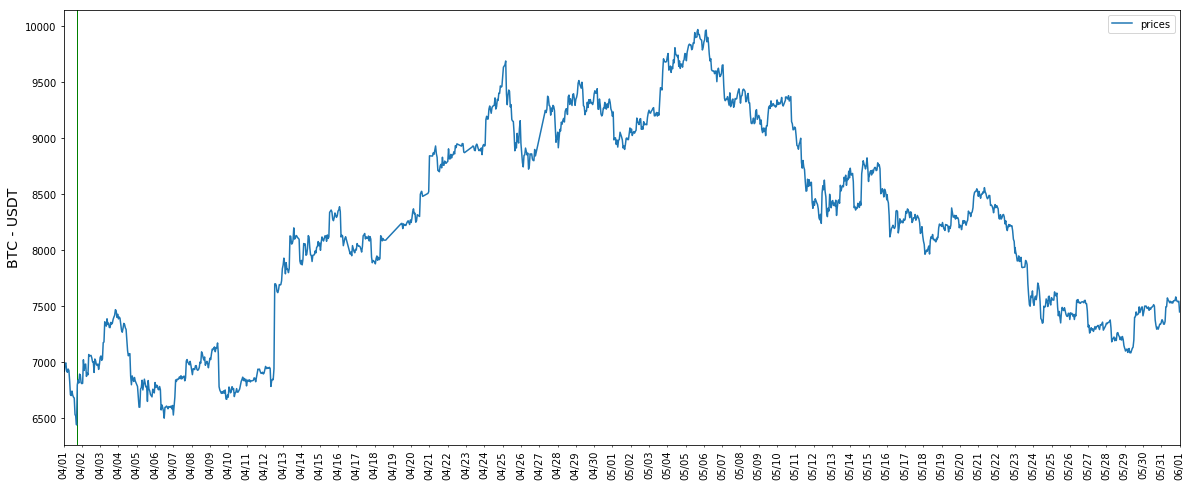

String representation:
if_then_else(bbands_price_gt_up(ARG0), if_then_else(lt(sma200(ARG0), 40.0), if_then_else(and_(slowd_lt_20(ARG0), macd_bullish(ARG0)), buy, sell), if_then_else(slowd_lt_20(ARG0), buy, ignore)), if_then_else(rsi_lt_25(ARG0), buy, if_then_else(slowd_lt_20(ARG0), if_then_else(macd_stoch_buy(ARG0), sell, buy), ignore)))



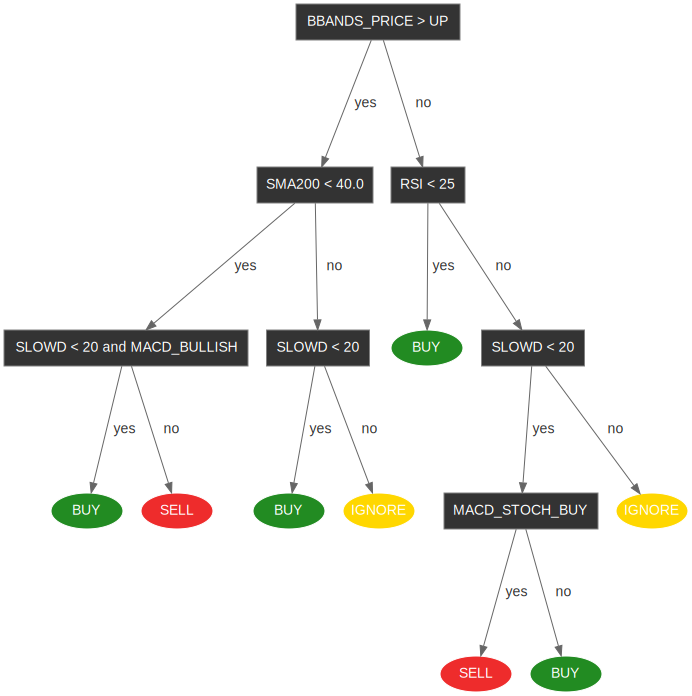

Backtesting report:
--

* Order execution log *

Start balance: cash = 1000 USDT, crypto = 0 
Start time: 2018-04-01 00:00:00
--
--
2018-04-01 17:00:00  	 OrderType.BUY    	 delta_cash ->      -1000.00 USDT 	 delta_currency ->      0.154844 BTC 	 (1 BTC = 6441.96103881 USDT ), slippage = 0.00
   signal: genetic_up strength=3 trend=1 horizon=None timestamp=2018-04-01 17:00:00 rsi_value=None
   cash: 0    crypto: 0.15484415288923645
End time: 2018-06-01 00:00:00

Summary
--
Number of trades: 1
End cash: 0.00 USDT
End crypto: 0.154844 BTC
End price: 7450.0
Total value invested: 1000 USDT
Total value after investment: 1150.70 USDT (+15.07%)
Profit: 150.70 USDT

Additional stats:
  Max drawdown: -0.2894338825029078
  Max drawdown duration: 2044800.0
  Sharpe ratio: 0.26454568278156165
  Alpha: 0.013068947390828773
  Beta: 0.9844910796129412
  Buy-sell pair gains - overall stats
     min = nan, max = nan, mean = nan, stdev = nan
  Buy-sell pair losses - overall stats
     min = nan, max = na

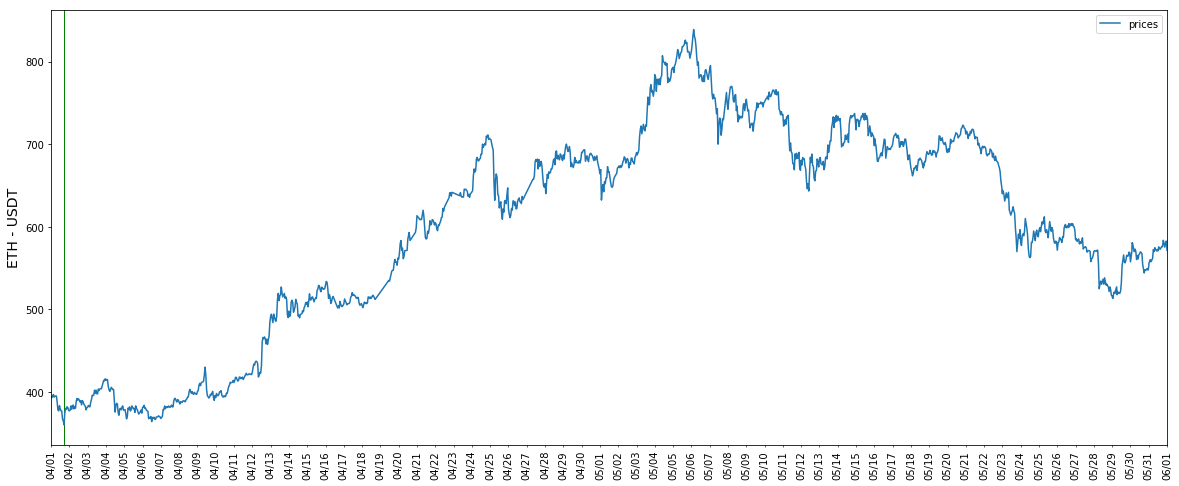

String representation:
if_then_else(bbands_price_gt_up(ARG0), if_then_else(lt(sma200(ARG0), 40.0), if_then_else(and_(slowd_lt_20(ARG0), macd_bullish(ARG0)), buy, sell), if_then_else(slowd_lt_20(ARG0), buy, ignore)), if_then_else(rsi_lt_25(ARG0), buy, if_then_else(slowd_lt_20(ARG0), if_then_else(macd_stoch_buy(ARG0), sell, buy), ignore)))



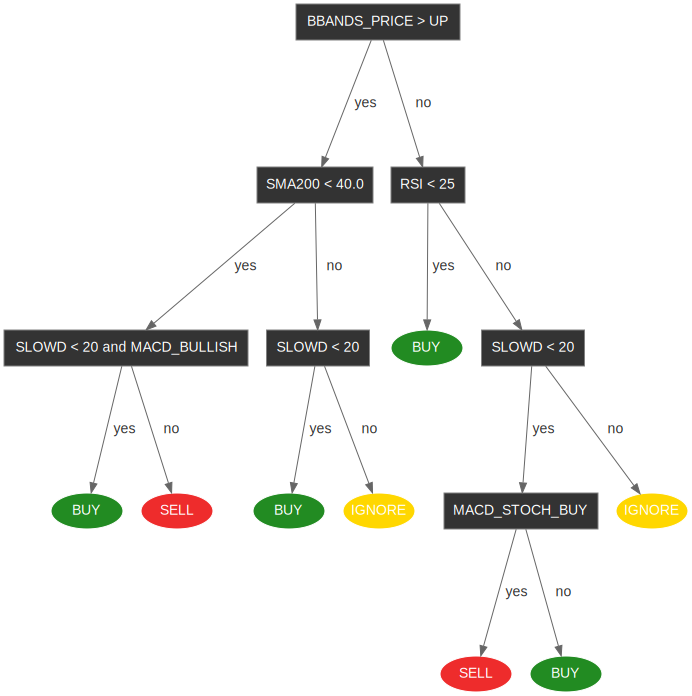

Backtesting report:
--

* Order execution log *

Start balance: cash = 1000 USDT, crypto = 0 
Start time: 2018-04-01 00:00:00
--
--
2018-04-01 17:00:00  	 OrderType.BUY    	 delta_cash ->      -1000.00 USDT 	 delta_currency ->      2.770756 ETH 	 (1 ETH = 360.01000000 USDT ), slippage = 0.00
   signal: genetic_up strength=3 trend=1 horizon=None timestamp=2018-04-01 17:00:00 rsi_value=None
   cash: 0    crypto: 2.77075636787867
End time: 2018-06-01 00:00:00

Summary
--
Number of trades: 1
End cash: 0.00 USDT
End crypto: 2.770756 ETH
End price: 571.30735324
Total value invested: 1000 USDT
Total value after investment: 1579.00 USDT (+57.90%)
Profit: 579.00 USDT

Additional stats:
  Max drawdown: -0.38820755978910304
  Max drawdown duration: 1980000.0
  Sharpe ratio: 0.5542341254223523
  Alpha: 0.015215523792116062
  Beta: 0.9868382140056097
  Buy-sell pair gains - overall stats
     min = nan, max = nan, mean = nan, stdev = nan
  Buy-sell pair losses - overall stats
     min = nan, max = 

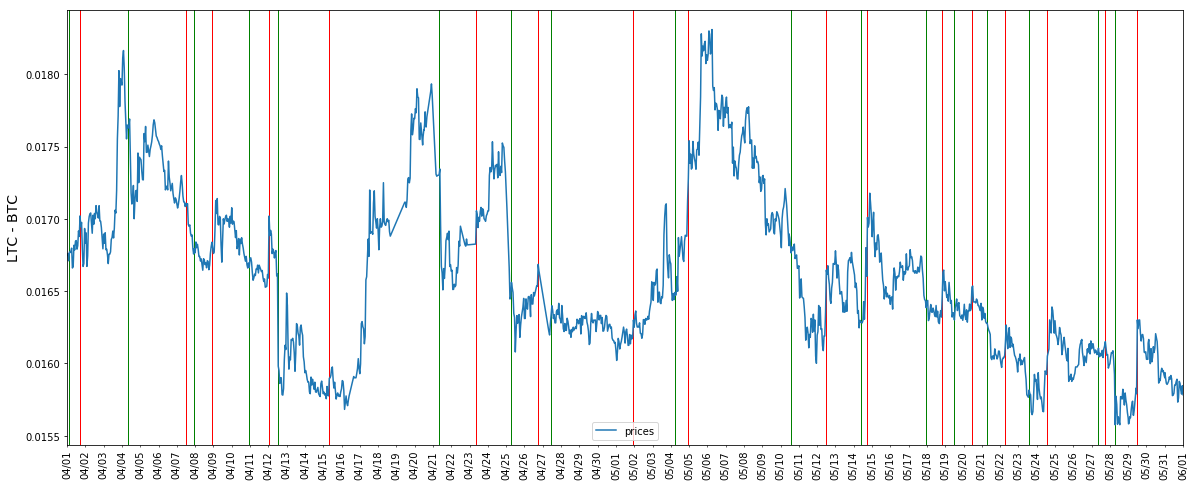

String representation:
if_then_else(bbands_price_gt_up(ARG0), if_then_else(lt(sma200(ARG0), 40.0), if_then_else(and_(slowd_lt_20(ARG0), macd_bullish(ARG0)), buy, sell), if_then_else(slowd_lt_20(ARG0), buy, ignore)), if_then_else(rsi_lt_25(ARG0), buy, if_then_else(slowd_lt_20(ARG0), if_then_else(macd_stoch_buy(ARG0), sell, buy), ignore)))



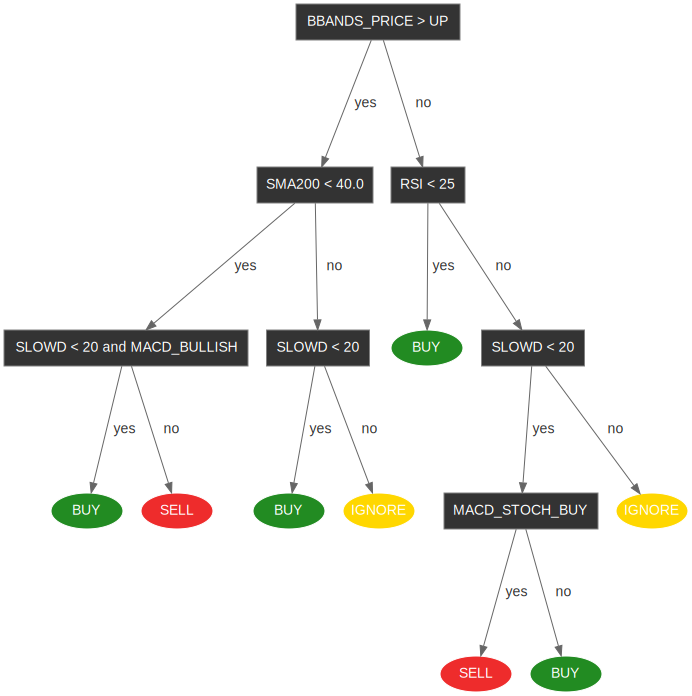

Backtesting report:
--

* Order execution log *

Start balance: cash = 1000 BTC, crypto = 0 
Start time: 2018-04-01 00:00:00
--
--
2018-04-01 03:00:00  	 OrderType.BUY    	 delta_cash ->      -1000.00 BTC 	 delta_currency ->  59481.216458 LTC 	 (1 LTC = 0.01677000 BTC ), slippage = 0.00
   signal: genetic_up strength=3 trend=1 horizon=None timestamp=2018-04-01 03:00:00 rsi_value=None
   cash: 0.0    crypto: 59481.21645796065
2018-04-01 17:00:00  	 OrderType.SELL   	 delta_cash ->       1009.84 BTC 	 delta_currency -> -59481.216458 LTC 	 (1 LTC = 0.01702002 BTC ), slippage = 0.00
   signal: genetic_down strength=3 trend=-1 horizon=None timestamp=2018-04-01 17:00:00 rsi_value=None
   cash: 1009.8405650044724    crypto: 0.0
2018-04-04 08:00:00  	 OrderType.BUY    	 delta_cash ->      -1009.84 BTC 	 delta_currency ->  57146.518310 LTC 	 (1 LTC = 0.01762690 BTC ), slippage = 0.00
   signal: genetic_up strength=3 trend=1 horizon=None timestamp=2018-04-04 08:00:00 rsi_value=None
   cash: 0.0 


Benchmark backtesting report:
 Buy&hold, start_time=1522540800.0, end_time=1527811200.0, transaction_currency=LTC, counter_currency=BTC, source=0
--

* Order execution log *

Start balance: cash = 1000 BTC, crypto = 0 
Start time: 2018-04-01 00:00:00
--
--
2018-04-01 00:00:00  	 OrderType.BUY    	 delta_cash ->      -1000.00 BTC 	 delta_currency ->  59521.998077 LTC 	 (1 LTC = 0.01675851 BTC ), slippage = 0.00
   cash: 0.0    crypto: 59521.9980773947
2018-06-01 00:00:00  	 OrderType.SELL   	 delta_cash ->        937.10 BTC 	 delta_currency -> -59521.998077 LTC 	 (1 LTC = 0.01578322 BTC ), slippage = 0.00
   cash: 937.10016851886    crypto: 0.0
End time: 2018-06-01 00:00:00

Summary
--
Number of trades: 2
End cash: 937.10 BTC
End crypto: 0.000000 LTC
End price: 0.01578241
Total value invested: 1000 BTC
Total value after investment: 937.10 BTC (-6.29%)
Profit: -62.90 BTC
Total value invested: 6920000.00 USDT (conversion on 2018-04-01 00:00:00)
Total value after investment: 7014194.76 US

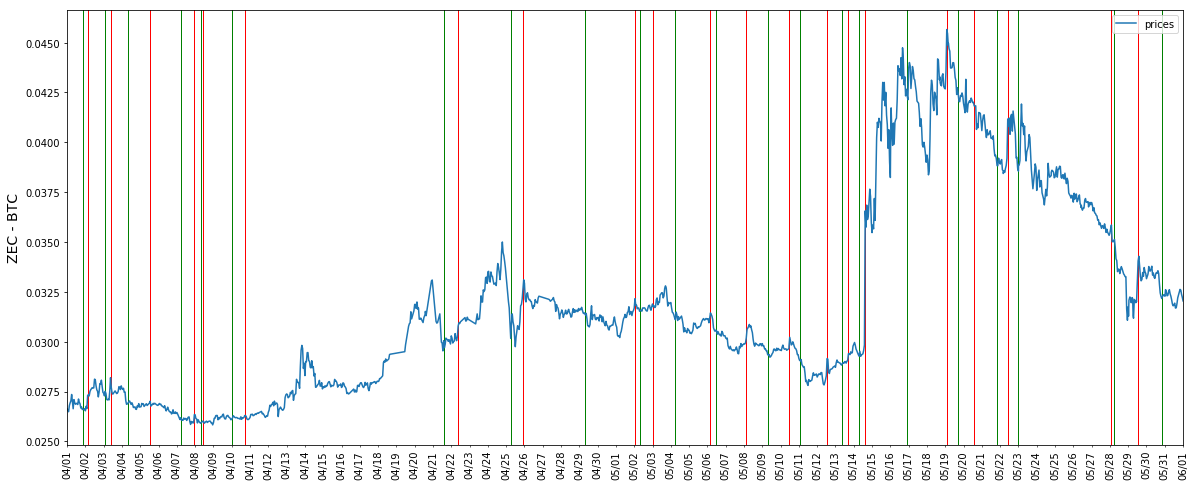

String representation:
if_then_else(bbands_price_gt_up(ARG0), if_then_else(lt(sma200(ARG0), 40.0), if_then_else(and_(slowd_lt_20(ARG0), macd_bullish(ARG0)), buy, sell), if_then_else(slowd_lt_20(ARG0), buy, ignore)), if_then_else(rsi_lt_25(ARG0), buy, if_then_else(slowd_lt_20(ARG0), if_then_else(macd_stoch_buy(ARG0), sell, buy), ignore)))



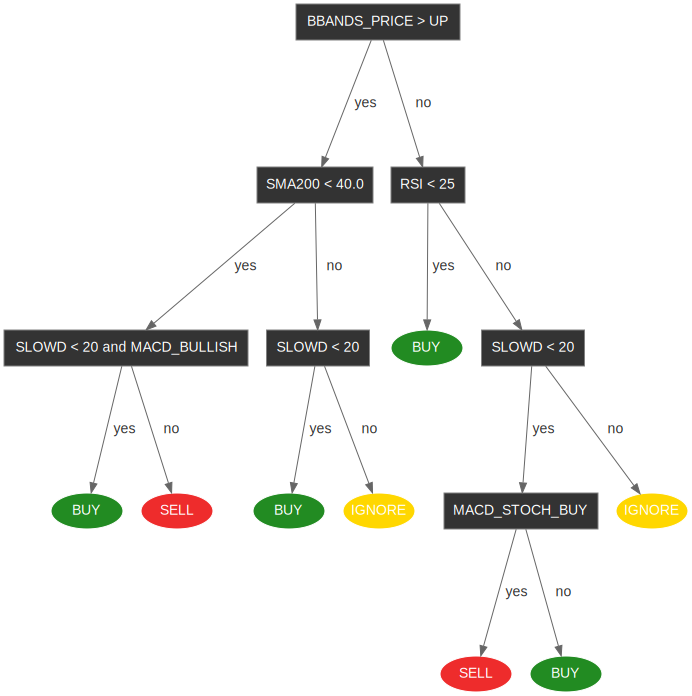

Backtesting report:
--

* Order execution log *

Start balance: cash = 1000 BTC, crypto = 0 
Start time: 2018-04-01 00:00:00
--
--
2018-04-01 21:00:00  	 OrderType.BUY    	 delta_cash ->      -1000.00 BTC 	 delta_currency ->  37492.374671 ZEC 	 (1 ZEC = 0.02660541 BTC ), slippage = 0.00
   signal: genetic_up strength=3 trend=1 horizon=None timestamp=2018-04-01 21:00:00 rsi_value=None
   cash: 0.0    crypto: 37492.3746711665
2018-04-02 03:00:00  	 OrderType.SELL   	 delta_cash ->       1021.54 BTC 	 delta_currency -> -37492.374671 ZEC 	 (1 ZEC = 0.02731501 BTC ), slippage = 0.00
   signal: genetic_down strength=3 trend=-1 horizon=None timestamp=2018-04-02 03:00:00 rsi_value=None
   cash: 1021.544327593993    crypto: 0.0
2018-04-03 02:00:00  	 OrderType.BUY    	 delta_cash ->      -1021.54 BTC 	 delta_currency ->  37033.823455 ZEC 	 (1 ZEC = 0.02751513 BTC ), slippage = 0.00
   signal: genetic_up strength=3 trend=1 horizon=None timestamp=2018-04-03 02:00:00 rsi_value=None
   cash: 0.0   


Benchmark backtesting report:
 Buy&hold, start_time=1522540800.0, end_time=1527811200.0, transaction_currency=ZEC, counter_currency=BTC, source=0
--

* Order execution log *

Start balance: cash = 1000 BTC, crypto = 0 
Start time: 2018-04-01 00:00:00
--
--
2018-04-01 00:00:00  	 OrderType.BUY    	 delta_cash ->      -1000.00 BTC 	 delta_currency ->  37544.771434 ZEC 	 (1 ZEC = 0.02656828 BTC ), slippage = 0.00
   cash: 0.0    crypto: 37544.77143420651
2018-06-01 00:00:00  	 OrderType.SELL   	 delta_cash ->       1198.55 BTC 	 delta_currency -> -37544.771434 ZEC 	 (1 ZEC = 0.03200311 BTC ), slippage = 0.00
   cash: 1198.5455765084344    crypto: 0.0
End time: 2018-06-01 00:00:00

Summary
--
Number of trades: 2
End cash: 1198.55 BTC
End crypto: 0.000000 ZEC
End price: 0.03204499
Total value invested: 1000 BTC
Total value after investment: 1198.55 BTC (+19.85%)
Profit: 198.55 BTC
Total value invested: 6920000.00 USDT (conversion on 2018-04-01 00:00:00)
Total value after investment: 897111

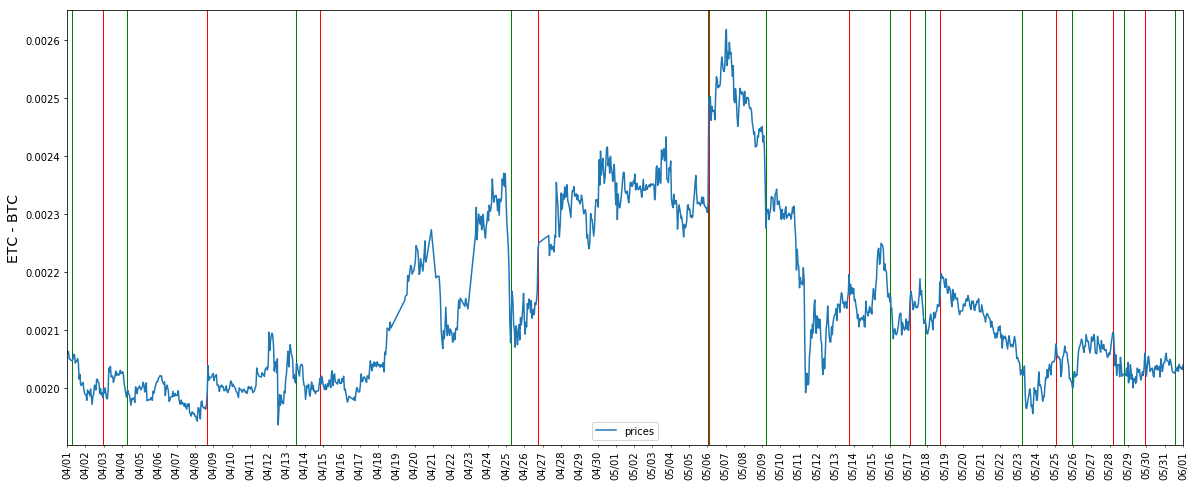

String representation:
if_then_else(bbands_price_gt_up(ARG0), if_then_else(lt(sma200(ARG0), 40.0), if_then_else(and_(slowd_lt_20(ARG0), macd_bullish(ARG0)), buy, sell), if_then_else(slowd_lt_20(ARG0), buy, ignore)), if_then_else(rsi_lt_25(ARG0), buy, if_then_else(slowd_lt_20(ARG0), if_then_else(macd_stoch_buy(ARG0), sell, buy), ignore)))



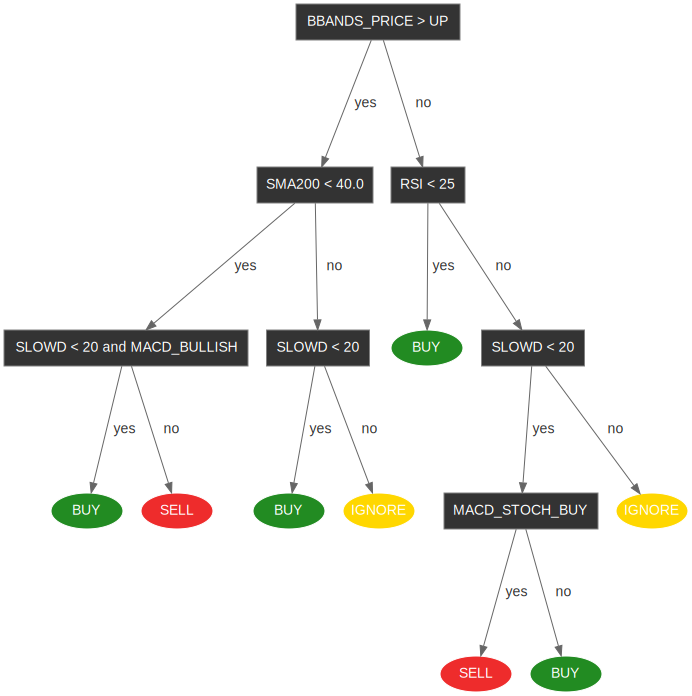

Backtesting report:
--

* Order execution log *

Start balance: cash = 1000 BTC, crypto = 0 
Start time: 2018-04-01 00:00:00
--
--
2018-04-01 07:00:00  	 OrderType.BUY    	 delta_cash ->      -1000.00 BTC 	 delta_currency -> 487419.923870 ETC 	 (1 ETC = 0.00204649 BTC ), slippage = 0.00
   signal: genetic_up strength=3 trend=1 horizon=None timestamp=2018-04-01 07:00:00 rsi_value=None
   cash: 0.0    crypto: 487419.92386964994
2018-04-02 23:00:00  	 OrderType.SELL   	 delta_cash ->        964.28 BTC 	 delta_currency -> -487419.923870 ETC 	 (1 ETC = 0.00198330 BTC ), slippage = 0.00
   signal: genetic_down strength=3 trend=-1 horizon=None timestamp=2018-04-02 23:00:00 rsi_value=None
   cash: 964.2831851731501    crypto: 0.0
2018-04-04 07:00:00  	 OrderType.BUY    	 delta_cash ->       -964.28 BTC 	 delta_currency -> 482528.582929 ETC 	 (1 ETC = 0.00199340 BTC ), slippage = 0.00
   signal: genetic_up strength=3 trend=1 horizon=None timestamp=2018-04-04 07:00:00 rsi_value=None
   cash: 0.0


Benchmark backtesting report:
 Buy&hold, start_time=1522540800.0, end_time=1527811200.0, transaction_currency=ETC, counter_currency=BTC, source=0
--

* Order execution log *

Start balance: cash = 1000 BTC, crypto = 0 
Start time: 2018-04-01 00:00:00
--
--
2018-04-01 00:00:00  	 OrderType.BUY    	 delta_cash ->      -1000.00 BTC 	 delta_currency -> 482739.930214 ETC 	 (1 ETC = 0.00206633 BTC ), slippage = 0.00
   cash: 0.0    crypto: 482739.9302144382
2018-06-01 00:00:00  	 OrderType.SELL   	 delta_cash ->        981.13 BTC 	 delta_currency -> -482739.930214 ETC 	 (1 ETC = 0.00203752 BTC ), slippage = 0.00
   cash: 981.133281953996    crypto: 0.0
End time: 2018-06-01 00:00:00

Summary
--
Number of trades: 2
End cash: 981.13 BTC
End crypto: 0.000000 ETC
End price: 0.002039
Total value invested: 1000 BTC
Total value after investment: 981.13 BTC (-1.89%)
Profit: -18.87 BTC
Total value invested: 6920000.00 USDT (conversion on 2018-04-01 00:00:00)
Total value after investment: 7343782.62 U

In [8]:
best_overall = best_individuals_across_variants_and_datasets.iloc[0]
evaluations = best_overall.evaluations
for evaluation in evaluations:
    e._print_individual_info(best_overall.individual, evaluation)

### Let's see its performance on the validation set...

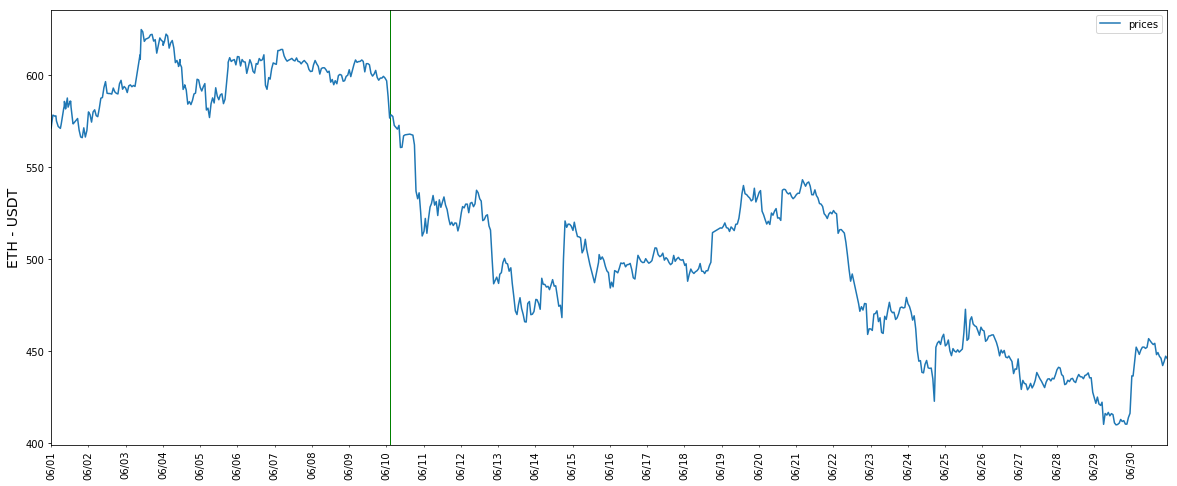

String representation:
if_then_else(bbands_price_gt_up(ARG0), if_then_else(lt(sma200(ARG0), 40.0), if_then_else(and_(slowd_lt_20(ARG0), macd_bullish(ARG0)), buy, sell), if_then_else(slowd_lt_20(ARG0), buy, ignore)), if_then_else(rsi_lt_25(ARG0), buy, if_then_else(slowd_lt_20(ARG0), if_then_else(macd_stoch_buy(ARG0), sell, buy), ignore)))



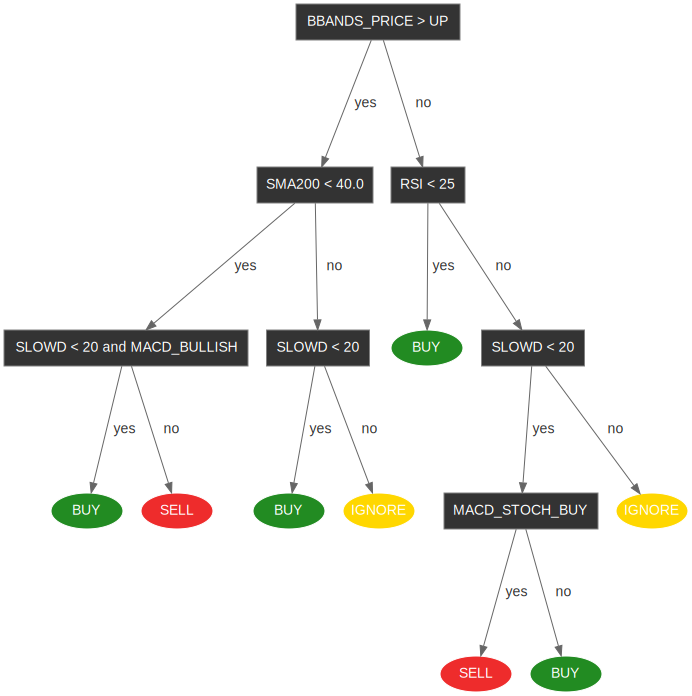

Backtesting report:
--

* Order execution log *

Start balance: cash = 1000 USDT, crypto = 0 
Start time: 2018-06-01 00:00:00
--
--
2018-06-10 02:04:00  	 OrderType.BUY    	 delta_cash ->      -1000.00 USDT 	 delta_currency ->      1.729734 ETH 	 (1 ETH = 576.67836259 USDT ), slippage = 0.00
   signal: genetic_up strength=3 trend=1 horizon=None timestamp=2018-06-10 02:04:00 rsi_value=None
   cash: 0    crypto: 1.7297337037581741
End time: 2018-07-01 00:00:00

Summary
--
Number of trades: 1
End cash: 0.00 USDT
End crypto: 1.729734 ETH
End price: 445.85890212
Total value invested: 1000 USDT
Total value after investment: 769.29 USDT (-23.07%)
Profit: -230.71 USDT

Additional stats:
  Max drawdown: -0.29167589464297927
  Max drawdown duration: 1681440.0
  Sharpe ratio: -0.5925375998235078
  Alpha: -0.019006910471422306
  Beta: 0.8289546634027191
  Buy-sell pair gains - overall stats
     min = nan, max = nan, mean = nan, stdev = nan
  Buy-sell pair losses - overall stats
     min = nan, ma

In [10]:
evaluation = e._build_evaluation_object(best_overall.individual, best_overall.variant, e.validation_data[0])
e._print_individual_info(best_overall.individual, evaluation)

In [11]:
perf = e.evaluate_individual_on_data_collection(best_overall.individual, best_overall.variant, e.validation_data)
#perf = perf.drop(['individual'], axis=1)
perf[CONDENSED_COLS]

,individual_str,transaction_currency,counter_currency,profit_percent,benchmark_profit_percent
0,"if_then_else(bbands_price_gt_up(ARG0), if_then_else(lt(sma200(ARG0), 40.0), if_then_else(and_(slowd_lt_20(ARG0), macd_bullish(ARG0)), buy, sell), if_then_else(slowd_lt_20(ARG0), buy, ignore)), if_then_else(rsi_lt_25(ARG0), buy, if_then_else(slowd_lt_20(ARG0), if_then_else(macd_stoch_buy(ARG0), sell, buy), ignore)))",ETH,USDT,-23.071087,-23.173546
1,"if_then_else(bbands_price_gt_up(ARG0), if_then_else(lt(sma200(ARG0), 40.0), if_then_else(and_(slowd_lt_20(ARG0), macd_bullish(ARG0)), buy, sell), if_then_else(slowd_lt_20(ARG0), buy, ignore)), if_then_else(rsi_lt_25(ARG0), buy, if_then_else(slowd_lt_20(ARG0), if_then_else(macd_stoch_buy(ARG0), sell, buy), ignore)))",LTC,BTC,-8.022494,-20.693062
2,"if_then_else(bbands_price_gt_up(ARG0), if_then_else(lt(sma200(ARG0), 40.0), if_then_else(and_(slowd_lt_20(ARG0), macd_bullish(ARG0)), buy, sell), if_then_else(slowd_lt_20(ARG0), buy, ignore)), if_then_else(rsi_lt_25(ARG0), buy, if_then_else(slowd_lt_20(ARG0), if_then_else(macd_stoch_buy(ARG0), sell, buy), ignore)))",ZEC,BTC,-9.275059,-17.080507
3,"if_then_else(bbands_price_gt_up(ARG0), if_then_else(lt(sma200(ARG0), 40.0), if_then_else(and_(slowd_lt_20(ARG0), macd_bullish(ARG0)), buy, sell), if_then_else(slowd_lt_20(ARG0), buy, ignore)), if_then_else(rsi_lt_25(ARG0), buy, if_then_else(slowd_lt_20(ARG0), if_then_else(macd_stoch_buy(ARG0), sell, buy), ignore)))",ETC,BTC,56.991268,22.133316


In [12]:
doge = DogeDNACanvas(best_overall.individual,"container")
HTML(doge.create_container())

In [13]:
Javascript(doge.show())

<IPython.core.display.Javascript object>